In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_bocim_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Ocimene
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.666667
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.666667
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.666667
3,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.666667
4,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42970,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
74996,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
74997,42973,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
74998,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Beta-Ocimene', 'index'], axis = 1)
y = df_knn[['X..Beta-Ocimene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.66666667],
       [0.66666667],
       [0.66666667],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

<AxesSubplot:ylabel='Count'>

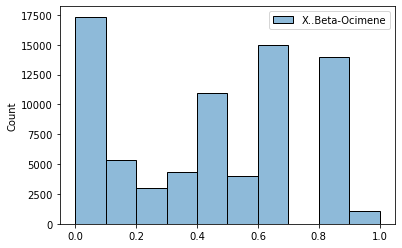

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.06217422397545476

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8787900478596257

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.799998366005641

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([2.15616198e-03, 5.33949174e-04, 6.66081800e-04, 9.53601655e-04,
       3.56426972e-03, 1.09785743e-03, 4.14746257e-04, 3.70873218e-03,
       2.84965125e-04, 8.49875781e-04, 4.48777303e-04, 1.00386686e-03,
       2.50461708e-04, 8.74074016e-05, 4.92083641e-04, 3.07064014e-04,
       6.12695301e-04, 1.49681449e-03, 9.54335434e-05, 6.20164253e-04,
       1.18986500e-03, 1.89835497e-03, 1.17485132e-03, 4.43910144e-03,
       9.80359317e-04, 1.82734879e-04, 2.20898083e-03, 8.90825325e-04,
       3.89746504e-04, 2.31075254e-04, 2.89131616e-03, 6.33527893e-04,
       5.22929130e-03, 2.48635819e-04, 1.96369788e-03, 2.31338492e-04,
       1.50557458e-04, 2.38421243e-03, 1.02576201e-04, 5.97325410e-04,
       4.03720896e-04, 1.05398422e-03, 1.17460922e-04, 1.94623444e-03,
       5.25578157e-04, 5.40932271e-04, 1.74183100e-03, 1.61733453e-04,
       2.08471561e-03, 6.48990341e-04, 1.88259837e-04, 2.73558467e-03,
       5.88001930e-04, 2.17012660e-03, 7.03921636e-04, 2.88294769e-04,
      

In [16]:
selector.threshold_

0.0021321961620469087

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_0,tfidf_4,tfidf_7,tfidf_23,tfidf_26,tfidf_30,tfidf_32,tfidf_37,tfidf_51,tfidf_53,...,cheese,citrus,diesel,earthy,lemon,lime,mint,orange,sweet,vanilla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_0',
 'tfidf_4',
 'tfidf_7',
 'tfidf_23',
 'tfidf_26',
 'tfidf_30',
 'tfidf_32',
 'tfidf_37',
 'tfidf_51',
 'tfidf_53',
 'tfidf_69',
 'tfidf_78',
 'tfidf_80',
 'tfidf_86',
 'tfidf_93',
 'tfidf_97',
 'tfidf_105',
 'tfidf_111',
 'tfidf_119',
 'tfidf_121',
 'tfidf_128',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_150',
 'tfidf_151',
 'tfidf_156',
 'tfidf_157',
 'tfidf_158',
 'tfidf_161',
 'tfidf_162',
 'tfidf_163',
 'tfidf_165',
 'tfidf_167',
 'tfidf_168',
 'tfidf_175',
 'tfidf_181',
 'tfidf_193',
 'tfidf_199',
 'tfidf_200',
 'tfidf_207',
 'tfidf_210',
 'tfidf_218',
 'tfidf_222',
 'tfidf_234',
 'tfidf_235',
 'tfidf_236',
 'tfidf_239',
 'tfidf_245',
 'tfidf_251',
 'tfidf_253',
 'tfidf_258',
 'tfidf_272',
 'tfidf_277',
 'tfidf_281',
 'tfidf_285',
 'tfidf_288',
 'tfidf_300',
 'tfidf_309',
 'tfidf_312',
 'tfidf_319',
 'tfidf_323',
 'tfidf_329',
 'tfidf_333',
 'tfidf_337',
 'tfidf_338',
 'tfidf_340',
 'tfidf_345',
 'tfidf_351',
 'tfidf_355',
 'tfidf_357',
 'tfidf_358

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_bocim.pkl")
joblib.dump(selector, "selector_knn_tfidf_bocim.pkl")

['selector_knn_tfidf_bocim.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.052443657368272764

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.013109551807493791

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.11449695108383363

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9098363523921503

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8533444036534373

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03134464076429593

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.009055847792077026

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.09516221830157716

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9853974273790798

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8986928937104025

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_bocim.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_bocim.pkl")

['y_test_knreg_tfidf_bocim.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03042673047238011

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9004838687066039

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.008777969431768555

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.09369081828956642

In [47]:
y_test

,X..Beta-Ocimene
11591,0.461538
52020,0.061144
34666,0.051282
22169,0.606838
23049,0.606838
...,...
60863,0.371795
32316,0.551282
60933,0.371795
43206,0.807692


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

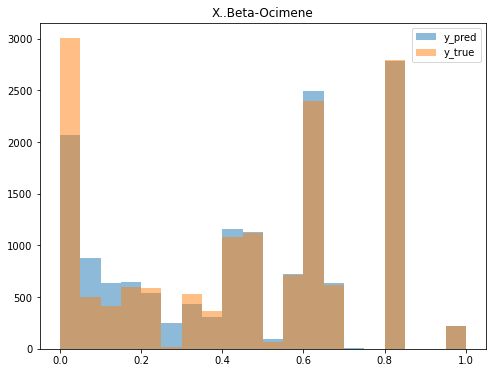

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Ocimene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_bocim.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.950
P-value: 0.000


<AxesSubplot:>

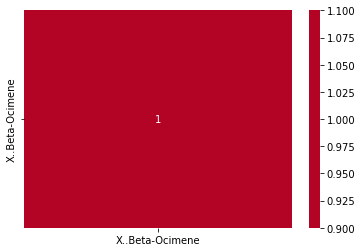

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)